# Tutorial 16 - Solving ODEs using Neural Networks
Based on various resources from internet.

In [3]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam

In [4]:
def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
#Define a list of (weights, biases tuples, one for each layer."
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

In [5]:
# Define a sigmoid activation function. Can also be used from library. This is a simple definition.
def sigmoid_activation(x):
    "see https://arxiv.org/pdf/1710.05941.pdf"
    return x / (1.0 + np.exp(-x))

In [6]:
# Define function y based on neural networks. Outputs are linearly related to biases and weights.
# Outputs of one layer are used as inputs to another layer via activation function.
def y(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = sigmoid_activation(outputs)    
    return outputs

In [7]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 8, 1])

In [8]:
dydx = elementwise_grad(y, 1) # this is the second partial derivative of y w/t x

In [9]:
k = 1.0
y0 = 1.0
x = np.linspace(0, 10).reshape((-1, 1))

In [10]:
# Define the objective function.
def lossfunction(params, step):
    # The objective is to minimize to zero.
    # dydx = -k * y(x)
    zeq = dydx(params, x) - (-k * y(params, x))
    ic = y(params, 0) - y0
    return np.mean(zeq**2) + ic**2

In [11]:
def callback(params, step, g):
    if step % 500 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,
                                                      lossfunction(params, step)))

In [12]:
params = adam(grad(lossfunction), params,
              step_size=0.001, num_iters=10001, callback=callback) 

Iteration   0 lossfunction [[0.63437147]]
Iteration 500 lossfunction [[0.00728755]]
Iteration 1000 lossfunction [[0.00338045]]
Iteration 1500 lossfunction [[0.00104329]]
Iteration 2000 lossfunction [[0.00038653]]
Iteration 2500 lossfunction [[0.00024771]]
Iteration 3000 lossfunction [[0.00018579]]
Iteration 3500 lossfunction [[0.00015435]]
Iteration 4000 lossfunction [[0.00013592]]
Iteration 4500 lossfunction [[0.00012043]]
Iteration 5000 lossfunction [[0.00010691]]
Iteration 5500 lossfunction [[9.27124017e-05]]
Iteration 6000 lossfunction [[7.65316839e-05]]
Iteration 6500 lossfunction [[6.00031559e-05]]
Iteration 7000 lossfunction [[4.56343011e-05]]
Iteration 7500 lossfunction [[3.43747595e-05]]
Iteration 8000 lossfunction [[2.58634049e-05]]
Iteration 8500 lossfunction [[1.9565836e-05]]
Iteration 9000 lossfunction [[1.49702565e-05]]
Iteration 9500 lossfunction [[1.14532175e-05]]
Iteration 10000 lossfunction [[8.59819672e-06]]


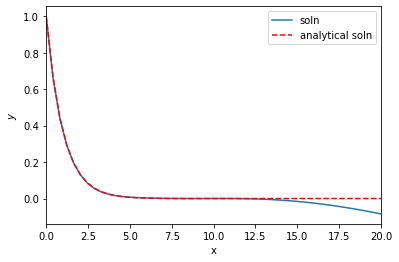

In [14]:
tfit = np.linspace(0, 20).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln')
plt.plot(tfit, y0 * np.exp(-k * tfit), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 20])
plt.savefig('odenn.png')

In [2]:
conda install -c conda-forge autograd


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\prakh\anaconda3

  added / updated specs:
    - autograd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    autograd-1.3               |             py_0          39 KB  conda-forge
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  autograd           conda-forge/noarch::autograd-1.3-py_0
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py38haa95532_0 --> conda-forge::conda-4.9.2-py38ha